## Acquisition Analytics : Bank Marketing

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

The objective is to reduce the customer acquisition cost by targeting the ones who are likely to buy and to improve the response rate, i.e. the fraction of prospects who respond to the campaign.

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [2820]:
import warnings
warnings.filterwarnings('ignore')

In [2821]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [2822]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [2823]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2824]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [2825]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [2826]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [2827]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [2828]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [2829]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [2830]:
# Determine the percentage of people who have bought the investment product, that is those who have the 
# response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

So this is a highly imbalanced set. We need to take care of this while building the model.

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

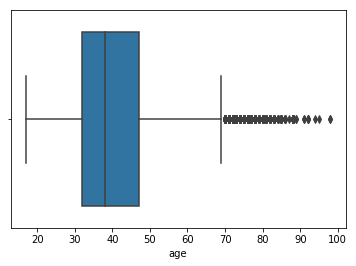

In [2831]:
sns.boxplot(x='age', data=loan)
plt.show()

In [2832]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

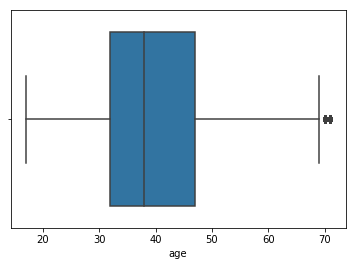

In [2833]:
sns.boxplot(x='age', data=loan)
plt.show()

In [2834]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [2835]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [2836]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [2837]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [2838]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [2839]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


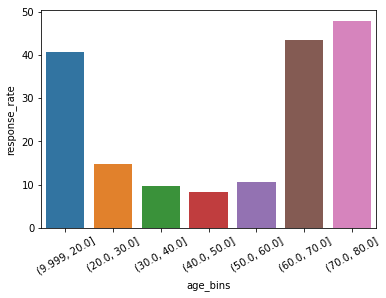

In [2840]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [2841]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [2842]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [2843]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [2844]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [2845]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [2846]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [2847]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


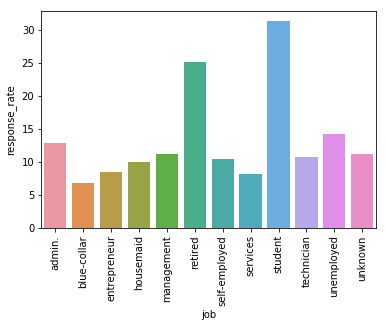

In [2848]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [2849]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [2850]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [2851]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [2852]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [2853]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [2854]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [2855]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


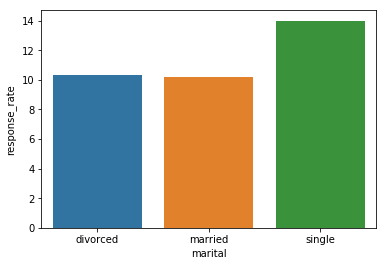

In [2856]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [2857]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [2858]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [2859]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [2860]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [2861]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [2862]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [2863]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [2864]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


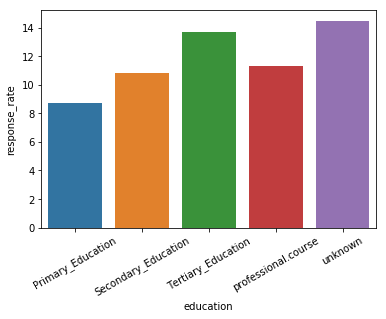

In [2865]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [2866]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [2867]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [2868]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [2869]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [2870]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [2871]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


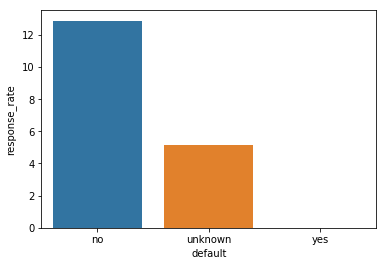

In [2872]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

People who have not defaulted previously have the highest response rate as mostly they are only contacted.

#### Housing

In [2873]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [2874]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [2875]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [2876]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [2877]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [2878]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


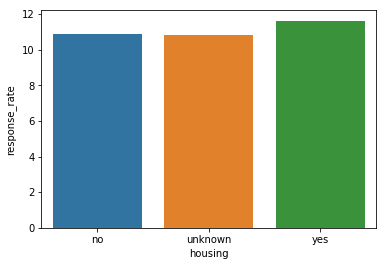

In [2879]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [2880]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [2881]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [2882]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [2883]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [2884]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [2885]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


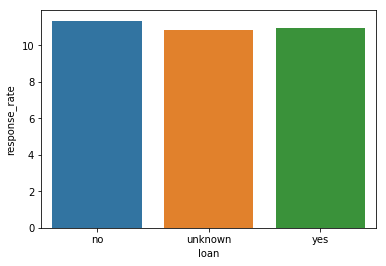

In [2886]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [2887]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [2888]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [2889]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [2890]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [2891]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [2892]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


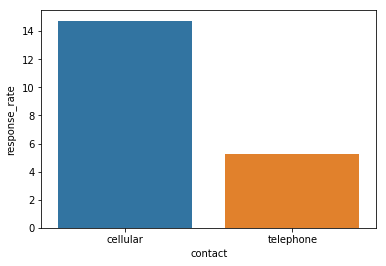

In [2893]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [2894]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [2895]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [2896]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [2897]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [2898]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [2899]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


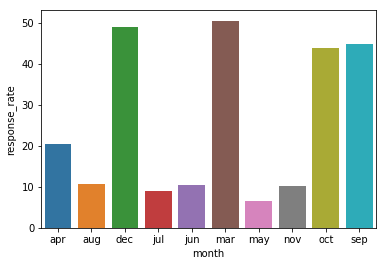

In [2900]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [2901]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [2902]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [2903]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [2904]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [2905]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [2906]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


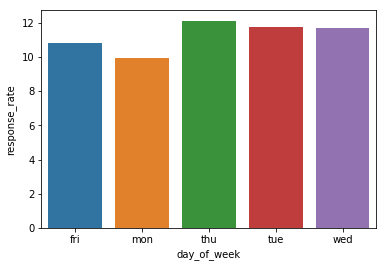

In [2907]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

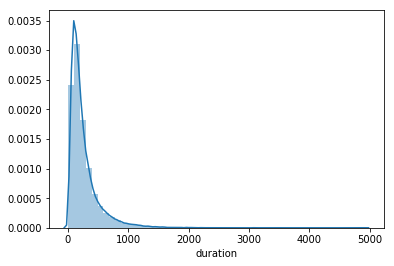

In [2908]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [2909]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

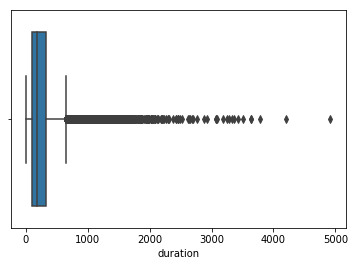

In [2910]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [2911]:
loan['duration'][loan['duration']>1271] =1271

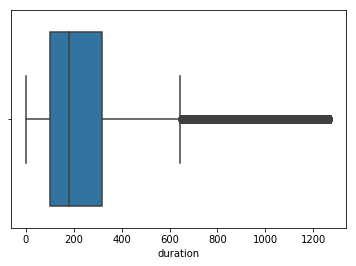

In [2912]:
sns.boxplot(x='duration', data=loan)
plt.show()

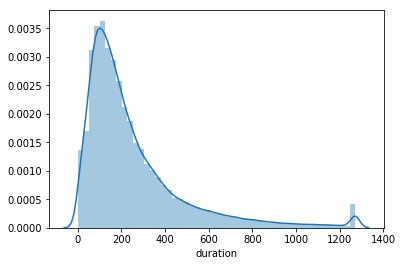

In [2913]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [2914]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

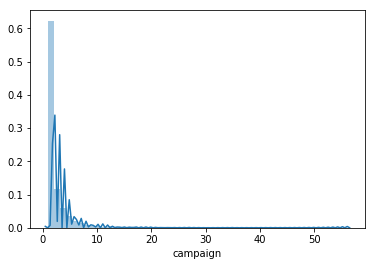

In [2915]:
sns.distplot(loan['campaign'])
plt.show()

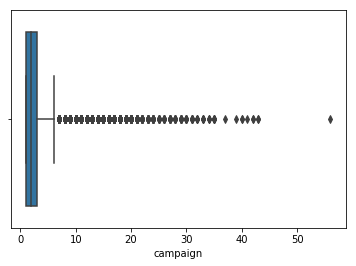

In [2916]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [2917]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [2918]:
loan['campaign'][loan['campaign']>14] =14

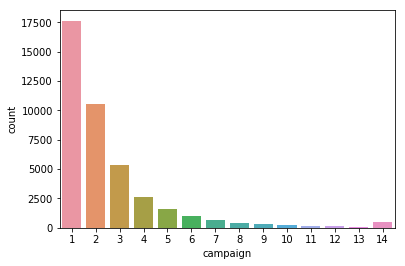

In [2919]:
sns.countplot(loan['campaign'])
plt.show()

In [2920]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [2921]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [2922]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [2923]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [2924]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


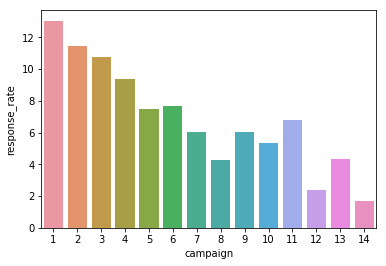

In [2925]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [2926]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [2927]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [2928]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [2929]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [2930]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [2931]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [2932]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [2933]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


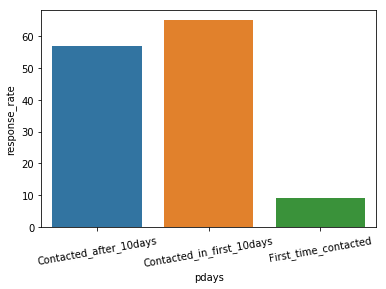

In [2934]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [2935]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [2936]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [2937]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [2938]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [2939]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [2940]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [2941]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [2942]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


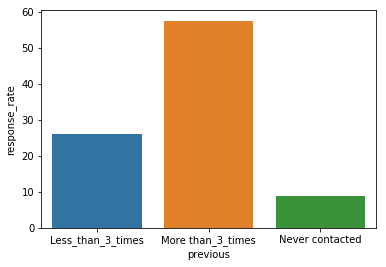

In [2943]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [2944]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

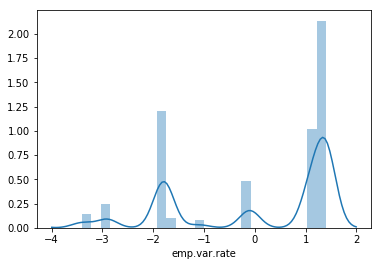

In [2945]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [2946]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [2947]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [2948]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [2949]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [2950]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [2951]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [2952]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


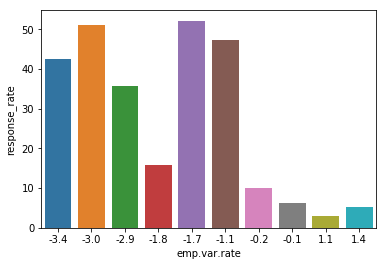

In [2953]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

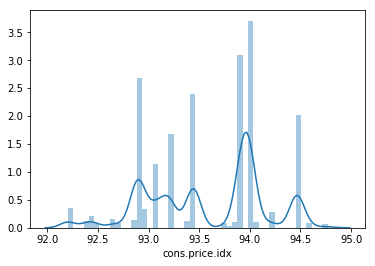

In [2954]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [2955]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [2956]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

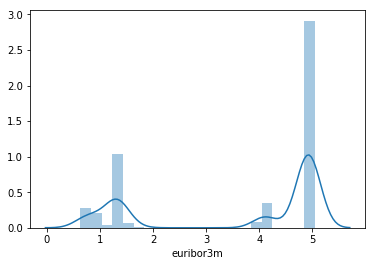

In [2957]:
sns.distplot(loan['euribor3m'])
plt.show()

In [2958]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

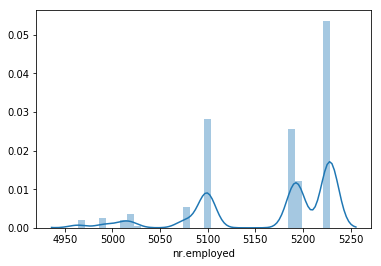

In [2959]:
sns.distplot(loan['nr.employed'])
plt.show()

In [2960]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [2961]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [2962]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [2963]:
# Droping the column age_bins we had created for the purpose of data visualisation.
loan.drop(['age_bins'], inplace = True, axis=1)

In [2964]:
#Add the prospectID
loan["ProspectID"]=loan.index

In [2965]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,ProspectID
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4


In [2966]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [2967]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [2968]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [2969]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [2970]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [2971]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [2972]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [2973]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [2974]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [2975]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [2976]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [2977]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [2978]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [2979]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [2980]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [2981]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,ProspectID,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,1,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,2,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,3,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,4,...,1,0,0,0,0,1,0,1,1,0


In [2982]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [2983]:
# Putting feature variable to X
X = loan.drop(['response'],axis=1)

# Putting response variable to y
y = loan['response']

In [2984]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [2985]:
# Make a deep copy of boh X_test and X_train as duration and prospect id will later needed to be appended
X_test_copy=X_test.copy()
X_train_copy=X_train.copy()

In [2986]:
#We need to drop duration as well as ProspectId as they are not useful for modelling
dcol = ["duration","ProspectID"]
X_train.drop(dcol,axis=1, inplace=True)
X_test.drop(dcol,axis=1, inplace=True)

In [2987]:
X_test_copy["duration"].head()

33148     52
27585    407
15722    177
40349    187
2576     165
Name: duration, dtype: int64

#### Standardisation

In [2988]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [2989]:
X_train.describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,...,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,39.942250,2.505879,0.079914,93.576063,-40.522191,3.618539,5166.894929,0.223405,0.035691,0.026152,...,0.206479,0.208630,0.194929,0.199716,0.032118,0.962783,0.002220,0.862891,0.862891,0.033575
std,10.196187,2.309557,1.569948,0.577822,4.622191,1.735223,72.253522,0.416535,0.185521,0.159591,...,0.404785,0.406336,0.396153,0.399793,0.176317,0.189296,0.047064,0.343969,0.343969,0.180136
min,17.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,38.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,47.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,71.000000,14.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The continuous variables are on different scale, so they need t be standardized.

In [2990]:
# Standardisation continuous features for X_train
cols=['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
X_train_df = X_train[cols]

In [2991]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [2992]:
X_train = X_train.drop(cols, 1)

In [2993]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [2994]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [2995]:
# Standardisation of continuous features for X_test
X_test_df = X_test[cols]

In [2996]:
std_X_test_df=(X_test_df-X_train_df.mean())/X_train_df.std()

In [2997]:
X_test = X_test.drop(cols, 1)

In [2998]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [2999]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.171247,-0.652021,-1.197437,-1.182133,-1.228380,-1.341349,-0.938292
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.103740,0.646930,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.582791,-0.652021,0.840847,0.591769,-0.471164,0.773077,0.847088
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.171247,-0.219037,-1.133741,0.780409,0.480766,-1.567256,-2.426109
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.476802,-0.219037,0.649758,0.723298,0.891826,0.713143,0.333618


In [3000]:
import statsmodels.api as sm

### Modelling

Now that the data preparation step is complete, we will do modelling using Logistic Regression.

#### Logistic Regression

In [3001]:
# Importing LogisticRegression and metrics from sklearn library
# Importing library for statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3002]:
# Running Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28782
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.3
Date:                Mon, 22 Jul 2019   Deviance:                       15867.
Time:                        13:57:55   Pearson chi2:                 2.92e+04
No. Iterations:                    19   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6435      0.284     -5.777      0.000      -2.201      -1.086
job_blue-collar                    -0.1547      0.083     -1.873      0.061      -0.317       0.007
job_entrepreneur                   -0.2347      0.132     -1.776      0.076      -0.494       0.024
job_housemaid                       0.0296      0.148      0.201      0.841      -0.260       0.319
job_management                     -0.1551      0.092     -1.690      0.091      -0.335       0.025
job_retired                         0.2281      0.110      2.071      0.038       0.012       0.444
job_self-employed                  -0.0586      0.121     -0.483      0.629      -0.297       0.179
job_services                       -0.0573      0.088     -0.649      0.516      -0.230       0.116
job_student                         0.2777      0.120      2.324      0.020       0.043       0.512
job_technician                     -0.0158      0.075     -0.211      0.833      -0.162       0.131
job_unemployed                     -0.0249      0.134     -0.186      0.853      -0.288       0.238
job_unknown                        -0.0977      0.241     -0.406      0.685      -0.569       0.374
marital_married                     0.0546      0.072      0.761      0.446      -0.086       0.195
marital_single                      0.1182      0.082      1.444      0.149      -0.042       0.279
education_Secondary_Education       0.0322      0.072      0.447      0.655      -0.109       0.174
education_Tertiary_Education        0.1214      0.073      1.663      0.096      -0.022       0.265
education_professional.course       0.0775      0.086      0.902      0.367      -0.091       0.246
education_unknown                   0.1810      0.109      1.663      0.096      -0.032       0.394
default_unknown                    -0.2785      0.070     -4.003      0.000      -0.415      -0.142
default_yes                       -17.5533   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0493      0.071     -0.693      0.489      -0.189       0.090
housing_yes                        -0.0349      0.043     -0.809      0.419      -0.120       0.050
loan_unknown                       -0.0493      0.071     -0.693      0.489      -0.189       0.090
loan_yes                            0.0121      0.059      0.203      0.839      -0.104       0.128
contact_telephone                  -0.6338      0.079     -8.055      0.000      -0.788      -0.480
month_aug                           0.4285      0.128      3.346      0.001       0.178       0.679
month_dec                           0.2895      0.226      1.282      0.200      -0.153       0.732
month_jul                          -0.0148      0.100     -0.148      0.882      -0.211       0.181
month_jun                          -0.6888      0.132     -5.2

### Feature selection using RFE

In [3003]:
# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE

In [3004]:
logreg = LogisticRegression(class_weight='balanced') # Handling class imbalance

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [3005]:
# Selecting only those columns having ranking as 1
col = X_train.columns[rfe.support_]
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'pdays_First_time_contacted', 'previous_Never contacted',
       'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [3006]:
#### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28815
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7996.2
Date:                Mon, 22 Jul 2019   Deviance:                       15992.
Time:                        13:58:12   Pearson chi2:                 2.86e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5997      0.214     -7.491      0.000      -2.018      -1.181
job_retired                    0.3005      0.083      3.618      0.000       0.138       0.463
job_student                    0.3453      0.105      3.300      0.001       0.140       0.550
contact_telephone             -0.5621      0.069     -8.104      0.000      -0.698      -0.426
month_aug                      0.5244      0.079      6.664      0.000       0.370       0.679
month_dec                      0.2235      0.200      1.118      0.264      -0.168       0.615
month_jun                     -0.5861      0.082     -7.113      0.000      -0.748      -0.425
month_mar                      1.3324      0.119     11.233      0.000       1.100       1.565
month_may                     -0.5104      0.063     -8.053      0.000      -0.635      -0.386
month_nov                     -0.5495      0.086     -6.416      0.000      -0.717      -0.382
pdays_First_time_contacted    -0.9775      0.215     -4.553      0.000      -1.398      -0.557
previous_Never contacted       0.4829      0.067      7.202      0.000       0.351       0.614
poutcome_success               0.8937      0.218      4.100      0.000       0.466       1.321
emp.var.rate                  -2.4182      0.150    -16.160      0.000      -2.712      -2.125
cons.price.idx                 0.9775      0.057     17.193      0.000       0.866       1.089
euribor3m                      0.9999      0.125      8.021      0.000       0.756       1.244
==============================================================================================
"""

#### Checking VIFs

In [3007]:
# Importing library for VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3008]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,emp.var.rate,76.15
14,euribor3m,51.33
9,pdays_First_time_contacted,14.84
10,previous_Never contacted,11.93
13,cons.price.idx,11.40
2,contact_telephone,4.78
7,month_may,3.37
3,month_aug,2.57
5,month_jun,2.32
8,month_nov,1.94


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with 
prediction and unnecessarily making the model complex. But first let us check the accuracy

In [3009]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'response':y_train.values, 'Prob':y_train_pred})
#y_train_pred_final['LeadID'] = y_train.index

##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.predicted))

0.8995872498352467


The accuracy is good

In [3010]:
col = col.drop('emp.var.rate', 1)
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'pdays_First_time_contacted', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [3011]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28816
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8122.8
Date:                Mon, 22 Jul 2019   Deviance:                       16246.
Time:                        13:58:13   Pearson chi2:                 3.06e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5000      0.211     -7.103      0.000      -1.914      -1.086
job_retired                    0.4211      0.081      5.179      0.000       0.262       0.581
job_student                    0.4274      0.103      4.155      0.000       0.226       0.629
contact_telephone             -0.1959      0.063     -3.120      0.002      -0.319      -0.073
month_aug                      0.0689      0.071      0.966      0.334      -0.071       0.209
month_dec                      0.4451      0.198      2.245      0.025       0.056       0.834
month_jun                      0.0338      0.074      0.459      0.646      -0.111       0.178
month_mar                      0.8171      0.115      7.081      0.000       0.591       1.043
month_may                     -0.9016      0.058    -15.549      0.000      -1.015      -0.788
month_nov                     -0.0627      0.079     -0.791      0.429      -0.218       0.093
pdays_First_time_contacted    -1.1613      0.212     -5.479      0.000      -1.577      -0.746
previous_Never contacted       0.4763      0.065      7.275      0.000       0.348       0.605
poutcome_success               0.8139      0.215      3.784      0.000       0.392       1.235
cons.price.idx                 0.1770      0.027      6.612      0.000       0.125       0.230
euribor3m                     -0.9622      0.030    -32.528      0.000      -1.020      -0.904
==============================================================================================
"""

In [3012]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,pdays_First_time_contacted,14.54
10,previous_Never contacted,11.92
12,cons.price.idx,4.04
2,contact_telephone,3.82
13,euribor3m,3.66
7,month_may,3.21
5,month_jun,2.09
3,month_aug,2.02
8,month_nov,1.67
11,poutcome_success,1.30


In [3013]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'response':y_train.values, 'Prob':y_train_pred})
#y_train_pred_final['LeadID'] = y_train.index

##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.predicted))

0.8994485102840692


The accuracy is still the same

In [3014]:
col = col.drop('pdays_First_time_contacted', 1)
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [3015]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28817
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8137.3
Date:                Mon, 22 Jul 2019   Deviance:                       16275.
Time:                        13:58:14   Pearson chi2:                 3.07e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5958      0.071    -36.794      0.000      -2.734      -2.458
job_retired                  0.4223      0.081      5.203      0.000       0.263       0.581
job_student                  0.4559      0.102      4.457      0.000       0.255       0.656
contact_telephone           -0.1965      0.063     -3.130      0.002      -0.320      -0.073
month_aug                    0.0940      0.071      1.323      0.186      -0.045       0.233
month_dec                    0.4428      0.198      2.239      0.025       0.055       0.830
month_jun                    0.0295      0.074      0.400      0.689      -0.115       0.174
month_mar                    0.8249      0.115      7.168      0.000       0.599       1.050
month_may                   -0.9056      0.058    -15.630      0.000      -1.019      -0.792
month_nov                   -0.0429      0.079     -0.543      0.587      -0.198       0.112
previous_Never contacted     0.4045      0.063      6.406      0.000       0.281       0.528
poutcome_success             1.8905      0.090     21.023      0.000       1.714       2.067
cons.price.idx               0.1905      0.027      7.158      0.000       0.138       0.243
euribor3m                   -0.9750      0.029    -33.129      0.000      -1.033      -0.917
============================================================================================
"""

In [3016]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cons.price.idx,4.02
2,contact_telephone,3.82
12,euribor3m,3.38
9,previous_Never contacted,3.20
7,month_may,2.89
5,month_jun,2.02
3,month_aug,1.85
8,month_nov,1.46
10,poutcome_success,1.23
6,month_mar,1.08


In [3017]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'response':y_train.values, 'Prob':y_train_pred})
#y_train_pred_final['LeadID'] = y_train.index

##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.predicted))

0.8994485102840692


The accuracy is still the same

In [3018]:
col = col.drop('month_jun', 1)
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_aug',
       'month_dec', 'month_mar', 'month_may', 'month_nov',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [3019]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28818
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8137.4
Date:                Mon, 22 Jul 2019   Deviance:                       16275.
Time:                        13:58:15   Pearson chi2:                 3.06e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5904      0.069    -37.425      0.000      -2.726      -2.455
job_retired                  0.4207      0.081      5.189      0.000       0.262       0.580
job_student                  0.4555      0.102      4.452      0.000       0.255       0.656
contact_telephone           -0.1885      0.059     -3.172      0.002      -0.305      -0.072
month_aug                    0.0887      0.070      1.271      0.204      -0.048       0.225
month_dec                    0.4369      0.197      2.216      0.027       0.050       0.823
month_mar                    0.8187      0.114      7.180      0.000       0.595       1.042
month_may                   -0.9131      0.055    -16.656      0.000      -1.021      -0.806
month_nov                   -0.0488      0.078     -0.629      0.530      -0.201       0.103
previous_Never contacted     0.4048      0.063      6.411      0.000       0.281       0.529
poutcome_success             1.8913      0.090     21.034      0.000       1.715       2.068
cons.price.idx               0.1915      0.026      7.231      0.000       0.140       0.243
euribor3m                   -0.9754      0.029    -33.190      0.000      -1.033      -0.918
============================================================================================
"""

In [3020]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,cons.price.idx,3.76
2,contact_telephone,3.19
11,euribor3m,2.98
8,previous_Never contacted,2.91
6,month_may,2.28
3,month_aug,1.85
7,month_nov,1.46
9,poutcome_success,1.23
0,job_retired,1.07
5,month_mar,1.07


In [3021]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'response':y_train.values, 'Prob':y_train_pred})
#y_train_pred_final['LeadID'] = y_train.index

##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.predicted))

0.8993444556206861


The accuracy is still almost the same

In [3022]:
col = col.drop('month_nov', 1)
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_aug',
       'month_dec', 'month_mar', 'month_may', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [3023]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28819
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8137.6
Date:                Mon, 22 Jul 2019   Deviance:                       16275.
Time:                        13:58:16   Pearson chi2:                 3.06e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.6040      0.066    -39.585      0.000      -2.733      -2.475
job_retired                  0.4207      0.081      5.188      0.000       0.262       0.580
job_student                  0.4550      0.102      4.446      0.000       0.254       0.656
contact_telephone           -0.1864      0.059     -3.141      0.002      -0.303      -0.070
month_aug                    0.1016      0.067      1.524      0.128      -0.029       0.232
month_dec                    0.4470      0.197      2.275      0.023       0.062       0.832
month_mar                    0.8263      0.113      7.286      0.000       0.604       1.049
month_may                   -0.9043      0.053    -17.055      0.000      -1.008      -0.800
previous_Never contacted     0.4086      0.063      6.501      0.000       0.285       0.532
poutcome_success             1.8898      0.090     21.025      0.000       1.714       2.066
cons.price.idx               0.1958      0.026      7.662      0.000       0.146       0.246
euribor3m                   -0.9803      0.028    -34.611      0.000      -1.036      -0.925
============================================================================================
"""

In [3024]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,contact_telephone,3.16
9,cons.price.idx,3.02
10,euribor3m,2.71
7,previous_Never contacted,2.51
6,month_may,2.10
3,month_aug,1.60
8,poutcome_success,1.18
0,job_retired,1.07
5,month_mar,1.06
1,job_student,1.05


In [3025]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'response':y_train.values, 'Prob':y_train_pred})
#y_train_pred_final['LeadID'] = y_train.index

##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.predicted))

0.8993444556206861


The accuracy is still the same

In [3026]:
col = col.drop('month_aug', 1)
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_dec',
       'month_mar', 'month_may', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [3027]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28820
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8138.8
Date:                Mon, 22 Jul 2019   Deviance:                       16278.
Time:                        13:58:17   Pearson chi2:                 3.06e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5809      0.064    -40.426      0.000      -2.706      -2.456
job_retired                  0.4274      0.081      5.280      0.000       0.269       0.586
job_student                  0.4627      0.102      4.531      0.000       0.263       0.663
contact_telephone           -0.1925      0.059     -3.251      0.001      -0.308      -0.076
month_dec                    0.4243      0.196      2.164      0.030       0.040       0.809
month_mar                    0.8102      0.113      7.179      0.000       0.589       1.031
month_may                   -0.9224      0.052    -17.871      0.000      -1.024      -0.821
previous_Never contacted     0.4070      0.063      6.486      0.000       0.284       0.530
poutcome_success             1.8995      0.090     21.201      0.000       1.724       2.075
cons.price.idx               0.1846      0.024      7.542      0.000       0.137       0.233
euribor3m                   -0.9683      0.027    -35.566      0.000      -1.022      -0.915
============================================================================================
"""

In [3028]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,contact_telephone,3.15
8,cons.price.idx,2.63
9,euribor3m,2.38
6,previous_Never contacted,2.06
5,month_may,2.03
7,poutcome_success,1.13
0,job_retired,1.06
4,month_mar,1.06
1,job_student,1.05
3,month_dec,1.03


__All the feature has p < 0.05 and VIF < 4__

In [3029]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3030]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [3031]:
## Creating a dataframe with the actual Churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'response':y_train, 'Prob':y_train_pred})
y_train_pred_final.head()

,response,Prob
7019,0,0.020875
27175,0,0.062318
15817,0,0.056608
40971,0,0.409775
8467,0,0.058552


In [3032]:
# Let's check roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_train_pred_final.response, y_train_pred_final.Prob))

'0.78'

### Finding Optimal Cutoff Point

In [3033]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,response,Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7019,0,0.020875,1,0,0,0,0,0,0,0,0,0
27175,0,0.062318,1,0,0,0,0,0,0,0,0,0
15817,0,0.056608,1,0,0,0,0,0,0,0,0,0
40971,0,0.409775,1,1,1,1,1,0,0,0,0,0
8467,0,0.058552,1,0,0,0,0,0,0,0,0,0
21860,0,0.048940,1,0,0,0,0,0,0,0,0,0
11416,0,0.055698,1,0,0,0,0,0,0,0,0,0
27833,1,0.378981,1,1,1,1,0,0,0,0,0,0
26816,0,0.072468,1,0,0,0,0,0,0,0,0,0
28102,0,0.242307,1,1,1,0,0,0,0,0,0,0


In [3034]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','precision'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.response, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision ]
print(cutoff_df)

     prob  accuracy     sensi     speci  precision
0.0   0.0  0.113003  1.000000  0.000000   0.113003
0.1   0.1  0.759218  0.694291  0.767489   0.275585
0.2   0.2  0.849190  0.581952  0.883236   0.388365
0.3   0.3  0.888939  0.371087  0.954913   0.511854
0.4   0.4  0.898026  0.243401  0.981426   0.625394
0.5   0.5  0.899240  0.202578  0.987995   0.682523
0.6   0.6  0.898789  0.169122  0.991749   0.723097
0.7   0.7  0.895668  0.112032  0.995503   0.760417
0.8   0.8  0.889771  0.032228  0.999022   0.807692


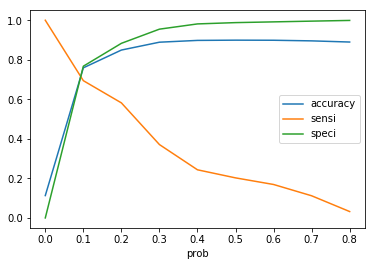

In [3035]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Since we need to target the responders and do not want to miss them We choose sensitivity/recall as the most important metric. Lets choose the optimal cut off point as 0.1

In [3036]:
# Predicting final_predicted for leads
y_train_pred_final['final_predicted'] = y_train_pred_final.Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,response,Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7019,0,0.020875,1,0,0,0,0,0,0,0,0,0,0
27175,0,0.062318,1,0,0,0,0,0,0,0,0,0,0
15817,0,0.056608,1,0,0,0,0,0,0,0,0,0,0
40971,0,0.409775,1,1,1,1,1,0,0,0,0,0,1
8467,0,0.058552,1,0,0,0,0,0,0,0,0,0,0


In [3037]:
y_train_pred_final=y_train_pred_final[["response","Prob","final_predicted"]]

In [3038]:
y_train_pred_final.head()

,response,Prob,final_predicted
7019,0,0.020875,0
27175,0,0.062318,0
15817,0,0.056608,0
40971,0,0.409775,1
8467,0,0.058552,0


In [3039]:
X_train_concat=X_train_copy[["ProspectID","duration"]]

In [3040]:
X_train_concat.head()

,ProspectID,duration
7019,7019,102
27175,27175,218
15817,15817,333
40971,40971,130
8467,8467,267


In [3041]:
X_train_concat.reset_index(drop=True, inplace=True)
y_train_pred_final.reset_index(drop=True, inplace=True)

In [3042]:
#Concatenate the duration and prospectID columns
y_train_pred_final=pd.concat([X_train_concat,y_train_pred_final],axis=1)

y_train_pred_final.head()

,ProspectID,duration,response,Prob,final_predicted
0,7019,102,0,0.020875,0
1,27175,218,0,0.062318,0
2,15817,333,0,0.056608,0
3,40971,130,0,0.409775,1
4,8467,267,0,0.058552,0


In [3043]:
### Model evaluation on train data

# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.final_predicted)

confusion4 = metrics.confusion_matrix(y_train_pred_final.response, y_train_pred_final.final_predicted )
confusion4

array([[19627,  5946],
       [  996,  2262]], dtype=int64)

In [3044]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final.response,
                                                              y_train_pred_final.final_predicted, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.69
Specificity: 	0.77


In [3045]:
# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final.response,y_train_pred_final.Prob),2))

AUC:    	 0.78


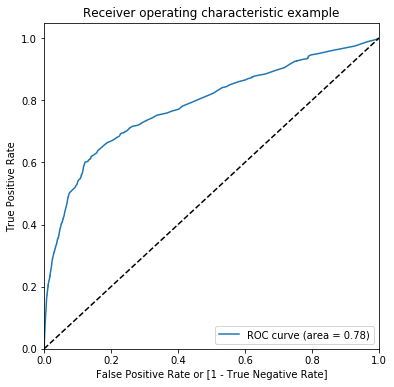

In [3046]:
# Plotting ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.response, y_train_pred_final.Prob,
                                         drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_train_pred_final.response, y_train_pred_final.Prob)
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [3047]:
### Model Evaluation on Test data

# Applying learning of train dataset to test dataset
X_test = X_test[col]

# Adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,job_retired,job_student,contact_telephone,month_dec,month_mar,month_may,previous_Never contacted,poutcome_success,cons.price.idx,euribor3m
33148,1.0,0,0,0,0,0,1,1,0,-1.182133,-1.341349
27585,1.0,0,0,0,0,0,0,1,0,-0.650827,0.231937
15722,1.0,0,0,0,0,0,0,1,0,0.591769,0.773077
40349,1.0,0,0,0,0,0,0,0,1,0.780409,-1.567256
2576,1.0,0,0,1,0,0,1,1,0,0.723298,0.713143


In [3048]:
y_test_pred = res.predict(X_test_sm)

# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [3049]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [3050]:
X_test_copy.columns

Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ProspectID',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_Secondary_Education',
       'education_Tertiary_Education', 'education_professional.course',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_Contacted_in_first_10days',
       'pdays_First_time_contacted', 'previous_More than_3_times',
       'previous_Never co

In [3051]:
#Add the duration and prospectID
X_test_concat=X_test_copy[["ProspectID","duration"]]

In [3052]:
X_test_concat.reset_index(drop=True, inplace=True)
y_pred_final=pd.concat([y_pred_final, X_test_concat],axis=1)

In [3053]:
y_pred_final.head()

,response,0,ProspectID,duration
0,0,0.117564,33148,52
1,0,0.074559,27585,407
2,0,0.056608,15722,177
3,1,0.727157,40349,187
4,0,0.020920,2576,165


In [3054]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Prob'})
y_pred_final.head()

,response,Prob,ProspectID,duration
0,0,0.117564,33148,52
1,0,0.074559,27585,407
2,0,0.056608,15722,177
3,1,0.727157,40349,187
4,0,0.020920,2576,165


In [3055]:
y_pred_final['final_predicted'] = y_pred_final.Prob.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

,response,Prob,ProspectID,duration,final_predicted
0,0,0.117564,33148,52,1
1,0,0.074559,27585,407,0
2,0,0.056608,15722,177,0
3,1,0.727157,40349,187,1
4,0,0.020920,2576,165,0


In [3056]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.response, y_pred_final.final_predicted)

0.7539046694181436

In [3057]:
# Confusion matrix 
confusion4_1 = metrics.confusion_matrix(y_pred_final.response, y_pred_final.final_predicted)
confusion4_1

array([[8380, 2595],
       [ 446,  936]], dtype=int64)

In [3058]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_pred_final.response,
                                                              y_pred_final.final_predicted, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.68
Specificity: 	0.76


In [3059]:
# check area under curve
print("AUC:    \t", round(roc_auc_score(y_pred_final.response,y_pred_final.Prob),2))

AUC:    	 0.78


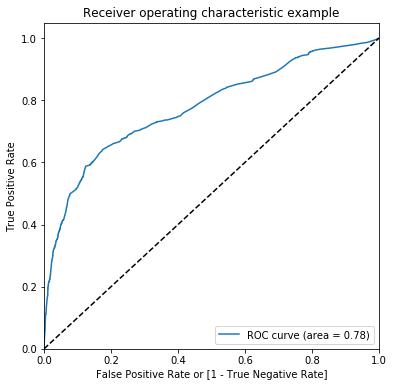

In [3060]:
# Plotting ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.response, y_pred_final.Prob,
                                         drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_pred_final.response, y_pred_final.Prob)
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [3061]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.response, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85     10975
           1       0.27      0.68      0.38      1382

   micro avg       0.75      0.75      0.75     12357
   macro avg       0.61      0.72      0.61     12357
weighted avg       0.87      0.75      0.79     12357



In [3062]:
#Merge the test and the train data for calculating the gain and lift in the response rate through the model
total_df=pd.concat([y_train_pred_final, y_pred_final],axis=0)

total_df.head()

,Prob,ProspectID,duration,final_predicted,response
0,0.020875,7019,102,0,0
1,0.062318,27175,218,0,0
2,0.056608,15817,333,0,0
3,0.409775,40971,130,1,0
4,0.058552,8467,267,0,0


#### Assumption : Cost of call is 1 Dollar/min

In [3063]:
total_df["cost"]=round(total_df["duration"]/60,2)

In [3064]:
total_df.head()

,Prob,ProspectID,duration,final_predicted,response,cost
0,0.020875,7019,102,0,0,1.70
1,0.062318,27175,218,0,0,3.63
2,0.056608,15817,333,0,0,5.55
3,0.409775,40971,130,1,0,2.17
4,0.058552,8467,267,0,0,4.45


In [3065]:
decile_df=total_df

In [3066]:
#Divide the dataset into 10 equal deciles
decile_df['decile'] = pd.qcut(decile_df['Prob'], 10, labels=np.arange(10, 0, -1))

In [3067]:
decile_df.head(10)

,Prob,ProspectID,duration,final_predicted,response,cost,decile
0,0.020875,7019,102,0,0,1.70,10
1,0.062318,27175,218,0,0,3.63,5
2,0.056608,15817,333,0,0,5.55,5
3,0.409775,40971,130,1,0,2.17,1
4,0.058552,8467,267,0,0,4.45,5
5,0.048940,21860,104,0,0,1.73,8
6,0.055698,11416,87,0,0,1.45,7
7,0.378981,27833,1271,1,1,21.18,1
8,0.072468,26816,627,0,0,10.45,4
9,0.242307,28102,383,1,0,6.38,2


In [3068]:
#Count of no. of prospects in each decile
lift_df = decile_df.groupby('decile')['Prob'].count().reset_index()

In [3069]:
lift_df.head(10)

,decile,Prob
0,10,5509
1,9,2761
2,8,4596
3,7,4202
4,6,3591
5,5,4254
6,4,3925
7,3,4272
8,2,3959
9,1,4119


In [3070]:
lift_df.rename({'Prob':'total'}, axis=1, inplace=True)

In [3071]:
#Count the no. of prospects who responded in each decile
lift_df_pred = decile_df[decile_df['response']==1].groupby('decile')['Prob'].count().reset_index()

In [3072]:
lift_df_pred.rename({'Prob':'actual'}, axis=1, inplace=True)

In [3073]:
lift_df_pred.head(10)

,decile,actual
0,10,178
1,9,114
2,8,247
3,7,169
4,6,227
5,5,232
6,4,232
7,3,388
8,2,890
9,1,1963


In [3074]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [3075]:
#Total duration of call for each decile
lift_df_dur = decile_df.groupby('decile')['duration'].sum().reset_index()

In [3076]:
lift_df_final = lift_df_final.merge(lift_df_dur,on = 'decile')

In [3077]:
#Total cost of call for each decile
lift_df_cost = decile_df.groupby('decile')['cost'].sum().reset_index()

In [3078]:
lift_df_final = lift_df_final.merge(lift_df_cost,on = 'decile')

In [3079]:
# Sort the dataframe on decile
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [3080]:
lift_df_final.head(10)

,decile,total,actual,duration,cost
9,1,4119,1963,1182970,19715.89
8,2,3959,890,1074493,17907.96
7,3,4272,388,1095687,18261.37
6,4,3925,232,959083,15984.78
5,5,4254,232,1120965,18682.38
4,6,3591,227,943900,15731.73
3,7,4202,169,906246,15104.36
2,8,4596,247,1062581,17709.82
1,9,2761,114,690535,11509.04
0,10,5509,178,1439676,23994.48


In [3081]:
# Find the cumulative duration of call
lift_df_final['cumdur']=lift_df_final['duration'].cumsum()

In [3082]:
# Find the cumulative cost of call
lift_df_final['cumcost']=lift_df_final['cost'].cumsum()

In [3083]:
# Find the cumulative total prospects
lift_df_final['cumtotal']=lift_df_final['total'].cumsum()

In [3084]:
#Find the cumulative average duration for each decile
lift_df_final['cumavgcostpercall'] = lift_df_final['cumcost']/lift_df_final['cumtotal']

In [3085]:
# Find the cumulative responders
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

In [3086]:
# Find the gain for each decile
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

In [3087]:
#Find the cumulative lift for each decile
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [3088]:
#Find the cumulative  average duration for each decile
lift_df_final['cumavgdur'] = lift_df_final['cumdur']/lift_df_final['cumtotal']

Cumlift is the ratio of the percentage of the cumulative responders(gain%) to the percentage of the people contacted.
eg - 42.306/10 = 4.2
61.49/20 = 3.07 and so on
A lift of 2, for example, corresponds to twice the number of responders reached compared with the number you’d expect by contacting the same number of customers at random. So, we may have only contacted 40% of the customers, but we may have reached 80% of the responders in the customer base. Therefore, we have doubled the number of responders reached by targeting this group compared with mailing a random sample of customers.

In [3089]:
lift_df_final

,decile,total,actual,duration,cost,cumdur,cumcost,cumtotal,cumavgcostpercall,cumresp,gain,cumlift,cumavgdur
9,1,4119,1963,1182970,19715.89,1182970,19715.89,4119,4.786572,1963,42.306034,4.230603,287.198349
8,2,3959,890,1074493,17907.96,2257463,37623.85,8078,4.657570,2853,61.487069,3.074353,279.458158
7,3,4272,388,1095687,18261.37,3353150,55885.22,12350,4.525119,3241,69.849138,2.328305,271.510121
6,4,3925,232,959083,15984.78,4312233,71870.00,16275,4.415975,3473,74.849138,1.871228,264.960553
5,5,4254,232,1120965,18682.38,5433198,90552.38,20529,4.410949,3705,79.849138,1.596983,264.659652
4,6,3591,227,943900,15731.73,6377098,106284.11,24120,4.406472,3932,84.741379,1.412356,264.390464
3,7,4202,169,906246,15104.36,7283344,121388.47,28322,4.286013,4101,88.383621,1.262623,257.162065
2,8,4596,247,1062581,17709.82,8345925,139098.29,32918,4.225600,4348,93.706897,1.171336,253.536819
1,9,2761,114,690535,11509.04,9036460,150607.33,35679,4.221176,4462,96.163793,1.068487,253.271112
0,10,5509,178,1439676,23994.48,10476136,174601.81,41188,4.239143,4640,100.000000,1.000000,254.349228


Note that you can attain around 80% of total conversions by targeting only 50% of the total client base. This can be used in cost optimization.

- The average call duration for choosing top 50% of the prospects is 264.66 secs
- The average cost per call is 4.4 Dollars
- The cost of acquisition of 80% of the responders with the model = cost of call = 90552 Dollars.
- Without the model the cost of acquisition of 80% of responders = 0.8 * 174602 = 139682 Dollars
#### Thus we achieve a lift of 1.6

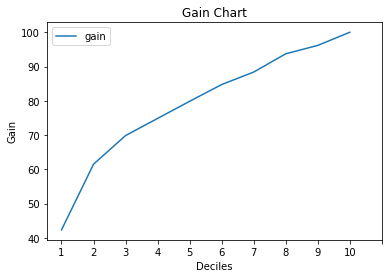

In [3090]:
#Plot the Gain chart
lift_df_final.plot('decile','gain')
plt.xticks(np.arange(0,11,1), range(1,11))
plt.title("Gain Chart")
plt.xlabel('Deciles')
plt.ylabel('Gain')

plt.show()

#### By contacting 50% of the customers (Decile 5) we get a gain of 80% i.e we are able to reach out to 80% responders.

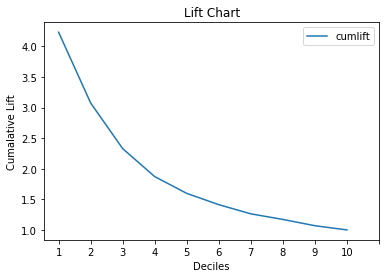

In [3091]:
#Plot the lift chart
lift_df_final.plot('decile','cumlift')
plt.xticks(np.arange(0,11,1), range(1,11))
plt.title("Lift Chart")
plt.xlabel('Deciles')
plt.ylabel('Cumalative Lift')

plt.show()

#### By contacting 50% prospects, we get a lift of almost 1.6